<a href="https://colab.research.google.com/github/Manchal09/mainflow-tasks/blob/main/MainFlowTask5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5: Classification Tasks Overview**


In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)  # For reproducibility
data = {
    'Study Hours': np.random.randint(1, 20, size=100),  # Random study hours between 1 and 20
    'Attendance': np.random.uniform(50, 100, size=100),  # Random attendance percentage between 50 and 100
}

# Create a binary Pass/Fail column based on a simple rule
data['Pass'] = np.where((data['Study Hours'] >= 10) & (data['Attendance'] >= 75), 1, 0)

# Convert to DataFrame
student_data = pd.DataFrame(data)

# Save to CSV
student_data.to_csv('student_data.csv', index=False)
print(student_data.head())

   Study Hours  Attendance  Pass
0            7   63.736090     0
1           15   78.062171     1
2           11   69.146344     0
3            8   98.585605     0
4            7   92.445691     0


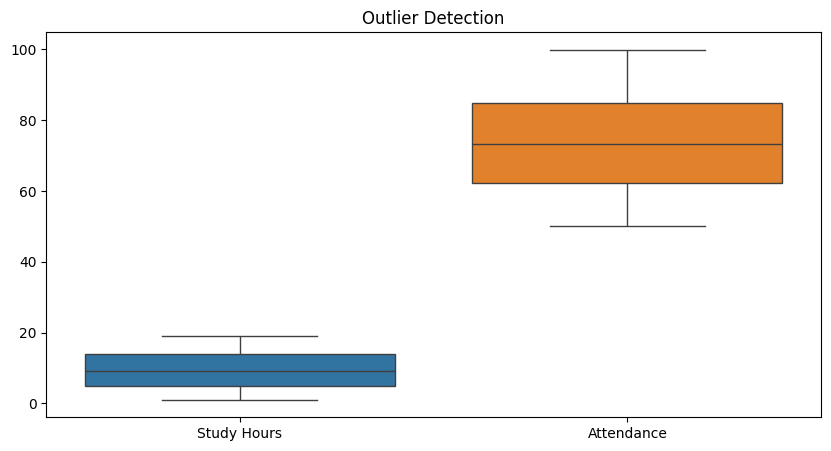

Study Hours    0
Attendance     0
Pass           0
dtype: int64


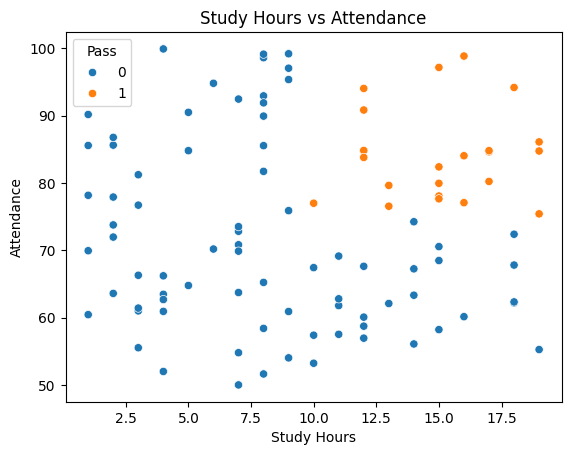

Accuracy: 1.0
Confusion Matrix:
[[14  0]
 [ 0  6]]


['student_pass_fail_model.pkl']

In [ ]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Detecting Outliers using Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Study Hours', 'Attendance']])
plt.title("Outlier Detection")
plt.show()

# Data Exploration
print(data.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=data)
plt.title('Study Hours vs Attendance')
plt.show()

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['Study Hours', 'Attendance']]
y = data['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Save the model
import joblib
joblib.dump(model, 'student_pass_fail_model.pkl')

**Task 2: Sentiment Analysis with Natural Language**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving review.task5.csv to review.task5.csv


Dataset Columns: Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


<ipython-input-38-fa5e02cf8606>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["review_text"].fillna("", inplace=True)  # Replace NaN in text with an empty string
<ipython-input-38-fa5e02cf8606>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

Sentiment Analysis Accuracy: 0.9572

Confusion Matrix:
 [[ 3681  1133]
 [  336 29166]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.76      0.83      4814
    positive       0.96      0.99      0.98     29502

    accuracy                           0.96     34316
   macro avg       0.94      0.88      0.90     34316
weighted avg       0.96      0.96      0.96     34316



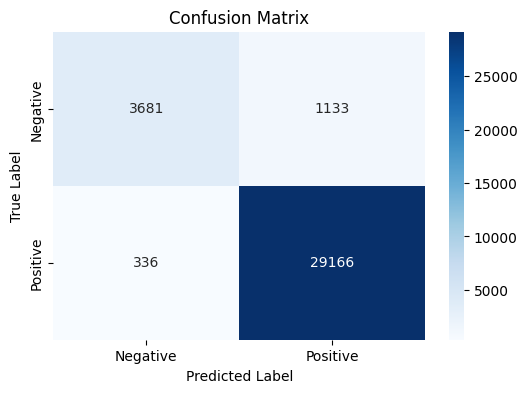

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('review.task5.csv')  # Change to your dataset filename

# Display column names to verify correct loading
print("Dataset Columns:", df.columns)

# Rename columns for easier access (if needed)
df.rename(columns={"Review": "review_text", "Sentiment": "sentiment"}, inplace=True)

# Drop unnecessary columns (keeping only 'review_text' and 'sentiment')
df = df[['review_text', 'sentiment']]

# Handle missing values
df["review_text"].fillna("", inplace=True)  # Replace NaN in text with an empty string
df["sentiment"].fillna("neutral", inplace=True)  # Replace NaN in sentiment with 'neutral'

# Ensure only valid sentiment labels are used
valid_sentiments = ["positive", "negative"]
df = df[df["sentiment"].isin(valid_sentiments)]  # Remove invalid labels

# Ensure review_text is not empty or just spaces
df = df[df["review_text"].str.strip() != ""]

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")  # Remove common stop words
X = vectorizer.fit_transform(df["review_text"])
y = df["sentiment"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Sentiment Analysis Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()